In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Load the dataset from a CSV file, initially observing that all data is in one column
df = pd.read_csv(r"/data/fake_bills.csv")
df.head()
# As you see there all the data is in one column and must be splited

,is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length
0,True;171.81;104.86;104.95;4.52;2.89;112.83
1,True;171.46;103.36;103.66;3.77;2.99;113.09
2,True;172.69;104.48;103.5;4.4;2.94;113.16
3,True;171.36;103.91;103.94;3.62;3.01;113.51
4,True;171.73;104.28;103.46;4.04;3.48;112.54


In [124]:
# Load the dataset again, specifying semicolon as the delimiter to correctly split data into columns
df = pd.read_csv(r"/data/fake_bills.csv", sep=";")
df.head()
df.isnull().sum()
# Now the data is extracted to columns.

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [125]:
# Encode the target variable 'is_genuine' (boolean) into numerical values (0 for False, 1 for True)
encoder = LabelEncoder()
df["is_genuine"] = encoder.fit_transform(df["is_genuine"])
# print(df["is_genuine"])

In [126]:
# Only the margin_low column has NaN so we only apply median for this column.
df["margin_low"] = df["margin_low"].fillna(df["margin_low"].median())
df.isnull().sum()
# Now the data is cleaned.

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [127]:
# Separate features (X) and target variable (y) for model training
x_part = df.drop("is_genuine", axis=1)
y_part = df["is_genuine"]
# print(x_part)
# print(y_part)

In [128]:
# Scale features to standardize them (zero mean, unit variance) for better KNN performance
scaler = StandardScaler()
x_part_scaled = scaler.fit_transform(x_part)
# print(x_part)
# print(y_part)
# Now all the data is cleaned, labeled and scaled

In [129]:
# Split the dataset into training (80%) and testing (20%) sets, using a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x_part_scaled, y_part, test_size=0.2, random_state=50)

In [130]:
# Initialize and train a K-Nearest Neighbors classifier with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [131]:
# Evaluate model performance on training and test sets
print(knn_model.score(x_train, y_train))
print(knn_model.score(x_test, y_test))

0.9933333333333333
0.99


In [132]:
# Generate predictions on the test set
y_pred = knn_model.predict(x_test)
# Display predicted and actual labels for comparison
print("Predicted Labels:", y_pred)
print("Actual Labels:", y_test.values)

Predicted Labels: [1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0
 0 1 1 0]
Actual Labels: [1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 

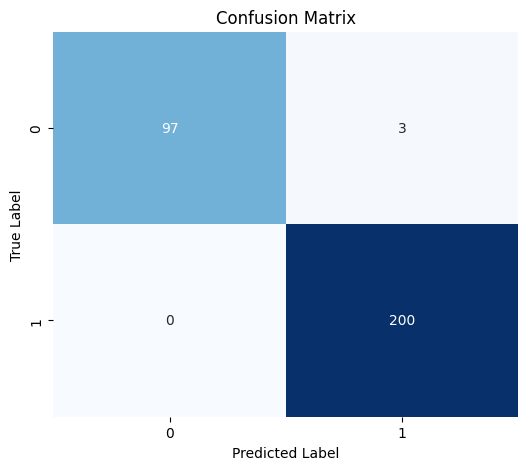

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       100
           1       0.99      1.00      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [133]:
# Visualize the confusion matrix to evaluate model performance (true vs. predicted labels)
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print a detailed classification report with precision, recall, and F1-score
# --- Classification Report ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred))